# Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd

In [3]:
DATA_PATH = 'data'

In [4]:
def append_arrays(data_array):
    data = data_array[0]
    for i in range(1, len(data_array)):
        data = np.concatenate((data, data_array[i]), axis=0)
    return data

In [5]:
def get_user_data(user_id=None, user_path=None):
    """
    reads user data from all files and appends it to just one

    """
    if user_path is None:
        folder_path = f'part{user_id}'
        path = os.path.join(DATA_PATH, folder_path)
    else:
        path = os.path.join(DATA_PATH, user_path)
    files_names = os.listdir(path)
    data_array = []
    for i in range(1, len(files_names)):
        if files_names[i].startswith('part'):
            data_path = os.path.join(path, files_names[i])
            aux = np.genfromtxt(data_path, delimiter=',')
            data_array += [aux]
            print(files_names[i], aux.shape)
    data = append_arrays(data_array)
    return data

In [6]:
data = get_user_data(user_id=0)

part0dev1.csv (53120, 12)
part0dev2.csv (52864, 12)
part0dev3.csv (53120, 12)
part0dev4.csv (53120, 12)
part0dev5.csv (53120, 12)


In [7]:
def get_all_data():
    users_list = os.listdir(DATA_PATH)
    data_array = []
    for user_path in users_list:
        if user_path.startswith('part'):
            data_array += [get_user_data(user_path=user_path)]

    data = append_arrays(data_array)
    return data

In [8]:
dataset = get_all_data()

part0dev1.csv (53120, 12)
part0dev2.csv (52864, 12)
part0dev3.csv (53120, 12)
part0dev4.csv (53120, 12)
part0dev5.csv (53120, 12)
part1dev2.csv (53376, 12)
part1dev3.csv (52992, 12)
part1dev4.csv (53376, 12)
part1dev5.csv (52096, 12)
part10dev2.csv (49664, 12)
part10dev3.csv (53248, 12)
part10dev4.csv (53248, 12)
part10dev5.csv (53248, 12)
part11dev2.csv (52864, 12)
part11dev3.csv (37760, 12)
part11dev4.csv (53760, 12)
part11dev5.csv (53760, 12)
part12dev2.csv (53120, 12)
part12dev3.csv (53120, 12)
part12dev4.csv (53120, 12)
part12dev5.csv (53120, 12)
part13dev2.csv (53504, 12)
part13dev3.csv (53504, 12)
part13dev4.csv (53504, 12)
part13dev5.csv (53504, 12)
part14dev2.csv (53248, 12)
part14dev3.csv (53248, 12)
part14dev4.csv (53248, 12)
part14dev5.csv (53248, 12)
part2dev2.csv (53248, 12)
part2dev3.csv (53248, 12)
part2dev4.csv (53248, 12)
part2dev5.csv (53248, 12)
part3dev2.csv (53247, 12)
part3dev3.csv (53291, 12)
part3dev4.csv (53199, 12)
part3dev5.csv (53235, 12)
part4dev2.csv (529

In [9]:
dataset.shape

(3242728, 12)

In [10]:
# convert numpy array to pandas to analyse more easily

def to_pandas_dataframe(dataset):
    columns = ['device_id', 
        'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
        'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
        'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
        'timestamp', 'activity'
    ]

    data = pd.DataFrame(data=dataset, columns=columns)
    return data

In [11]:
data = to_pandas_dataframe(dataset)

In [12]:
data.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242728 entries, 0 to 3242727
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   device_id        float64
 1   accelerometer_x  float64
 2   accelerometer_y  float64
 3   accelerometer_z  float64
 4   gyroscope_x      float64
 5   gyroscope_y      float64
 6   gyroscope_z      float64
 7   magnetometer_x   float64
 8   magnetometer_y   float64
 9   magnetometer_z   float64
 10  timestamp        float64
 11  activity         float64
dtypes: float64(12)
memory usage: 296.9 MB


In [14]:
data.count()

device_id          3242728
accelerometer_x    3242728
accelerometer_y    3242728
accelerometer_z    3242728
gyroscope_x        3242728
gyroscope_y        3242728
gyroscope_z        3242728
magnetometer_x     3242728
magnetometer_y     3242728
magnetometer_z     3242728
timestamp          3242728
activity           3242728
dtype: int64

In [15]:
data.columns

Index(['device_id', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
       'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'timestamp', 'activity'],
      dtype='object')

In [16]:
def append_metrics(dataset):
    data = dataset.copy()
    data['accelerometer_module'] = np.sqrt(data['accelerometer_x']**2 + data['accelerometer_y']**2 + data['accelerometer_z']**2)
    data['gyroscope_module'] = np.sqrt(data['gyroscope_x']**2 + data['gyroscope_y']**2 + data['gyroscope_z']**2)
    data['magnetometer_module'] = np.sqrt(data['magnetometer_x']**2 + data['magnetometer_y']**2 + data['magnetometer_z']**2)

    return data

In [17]:
data_with_features = append_metrics(data)

## Boxplot of the vector modules gouped by activity

<Figure size 2100x1000 with 0 Axes>

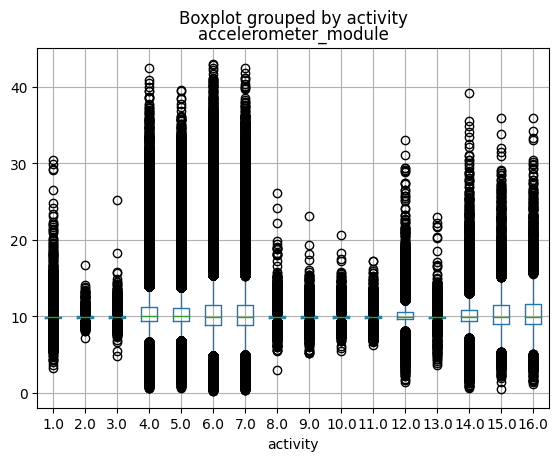

In [20]:
plt.figure(figsize=(21, 10))
data_with_features.boxplot(column=['accelerometer_module'], by='activity')
plt.show()

<Figure size 2100x1000 with 0 Axes>

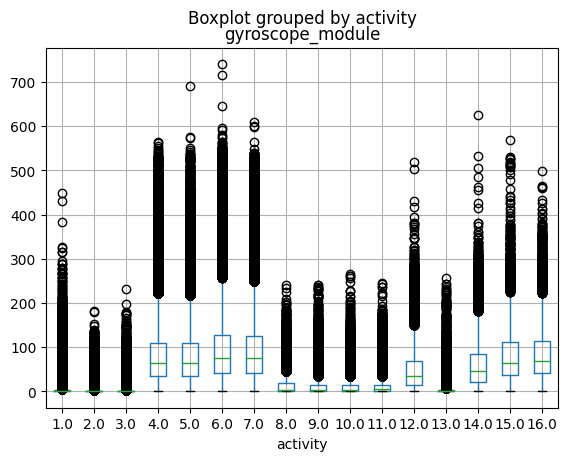

In [21]:
plt.figure(figsize=(21, 10))
data_with_features.boxplot(column=['gyroscope_module'], by='activity')
plt.show()

<Figure size 2100x1000 with 0 Axes>

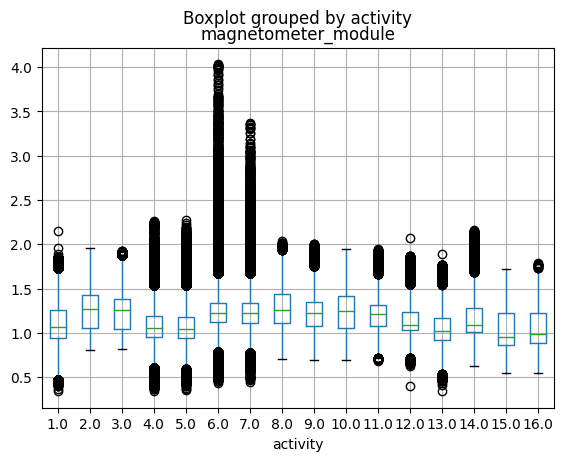

In [22]:
plt.figure(figsize=(21, 10))
data_with_features.boxplot(column=['magnetometer_module'], by='activity')
plt.show()